# Sieve analysis

# Document information

<table align="left">
    <tr>
        <th class="text-align:left">Title</th>
        <td class="text-align:left">Sieve analysis</td>
    </tr>
    <tr>
        <th class="text-align:left">Last modified</th>
        <td class="text-align:left">2019-05-09</td>
    </tr>
    <tr>
        <th class="text-align:left">Author</th>
        <td class="text-align:left">Gilles Pilon <gillespilon13@gmail.com></td>
    </tr>
    <tr>
        <th class="text-align:left">Status</th>
        <td class="text-align:left">Active</td>
    </tr>
    <tr>
        <th class="text-align:left">Type</th>
        <td class="text-align:left">Jupyter notebook</td>
    </tr>
    <tr>
        <th class="text-align:left">Created</th>
        <td class="text-align:left">2018-07-11</td>
    </tr>
    <tr>
        <th class="text-align:left">File name</th>
        <td class="text-align:left">sieve_analysis.ipynb</td>
    </tr>
    <tr>
        <th class="text-align:left">Other files required</th>
        <td class="text-align:left">sieve_data.csv</td>
    </tr>
</table>

# In brevi

The purpose of this Jupyter notebook is to perform a sieve analysis.

# Methodology

A sieve analysis is used to determine the particle size distribution of a granular material. Material is passed through a series of progressively smaller sieves. The mass of the material stopped by each sieve is determined as a fraction of the whole mass.

# Data

Download the data file:

[sieve_data.csv](https://drive.google.com/open?id=1QuhQmVAnxEakP879FnAt-GD0ElpuT49M)

This file has five columns:

- std sieve
- tyler sieve
- particle diameter
- sieve mass
- sieve soil mass

Clear the contents of the "sieve mass" and "sieve soil mass" columns. Enter values of "sieve mass" and "sieve soil mass" for the desired sieves. Save the file as a CSV with UTF-8 encoding.

# How to use this notebook

1. Edit the constant.
2. Recalculate all the "In" cells.

# Import libraries and basic setup

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

In [2]:
c = cm.Paired.colors
# c[0] c[1] ... c[11]
# See "paired" in "qualitative colormaps"
# https://matplotlib.org/tutorials/colors/colormaps.html

# Define the constant

In [3]:
# Enter the density of the material that was sieved.
density = 1.32

# Read the data file

In [4]:
df = pd.read_csv('sieve_data.csv')

# Perform the analysis

In [5]:
df['retained mass'] = df['sieve soil mass'] - df['sieve mass']
df= df.dropna(subset=['sieve mass'])
# rmt = retained mass total
rmt = df['retained mass'].sum()
df['retained pct'] = df['retained mass'] / rmt * 100
df['cumul retained pct'] = df['retained pct'].cumsum()
df['passing pct'] = 100 - df['cumul retained pct']
df.round(3)

,std sieve,tyler sieve,particle diameter,sieve mass,sieve soil mass,retained mass,retained pct,cumul retained pct,passing pct
1,4,4,4760,1.0,1.6,0.6,0.121,0.121,99.879
6,10,9,2000,1.0,1.6,0.6,0.121,0.241,99.759
11,20,20,841,208.0,416.0,208.0,41.860,42.101,57.899
15,40,35,420,191.4,382.8,191.4,38.519,80.620,19.380
18,60,60,250,72.3,144.6,72.3,14.550,95.170,4.830
25,200,200,74,23.1,46.2,23.1,4.649,99.819,0.181
29,pan,pan,10,0.9,1.8,0.9,0.181,100.000,0.000


# Save the results

In [6]:
df.to_csv('sieve_results.csv')

# Perform the geometric analysis

In [7]:
# gmps = geometric mean particle size
gmps = np.exp(((df['retained mass'] *\
       np.log(df['particle diameter'])).sum()) / rmt)
print('geometric mean particle size',
      np.exp(((df['retained mass'] *\
      np.log(df['particle diameter'])).sum())\
      / rmt).round(3),
      sep=" = ")
# gsd = geometric standard deviation
gsd = np.exp((((df['retained mass'] *\
      (np.log(df['particle diameter']) - (df['retained mass'] *\
      np.log(df['particle diameter'])).sum() / rmt)**2).sum())\
      / rmt)**0.5)
print('geometric standard deviation',
      gsd.round(3),
      sep=" = ")
surface_area = 6/density * np.exp(0.5 * (np.log(gsd)**2) -\
               np.log(gmps / 10000))
print('surface area',
      surface_area.round(3),
      sep=" = ")
# nppg = number parts per g
nppg = 1/density * np.exp((4.5 *\
       np.log(gsd)**2) -\
       3 * np.log(gmps / 10000))
print('number parts per g',
      nppg.round(3),
      sep=" = ")

geometric mean particle size = 479.502
geometric standard deviation = 1.881
surface area = 115.72
number parts per g = 41366.213


# Create graphs

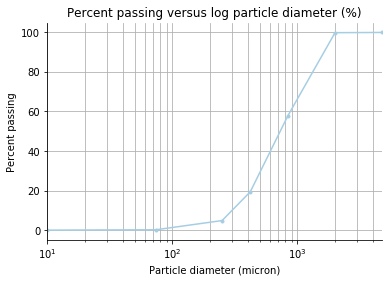

In [8]:
ax = df.plot(x='particle diameter', y='passing pct', logx=True, \
             style='.-', legend=False, color=c[0], grid=True)
ax.set_xlabel('Particle diameter (micron)')
ax.set_ylabel('Percent passing')
ax.set_title('Percent passing versus log particle diameter (%)')
ax.grid(True, which='minor', axis='x')
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')
ax.figure.savefig('sieve_percent_passing_vs_logdiameter.svg', \
                  format='svg')
ax.figure.savefig('sieve_percent_passing_vs_logdiameter.pdf', \
                  format='pdf')

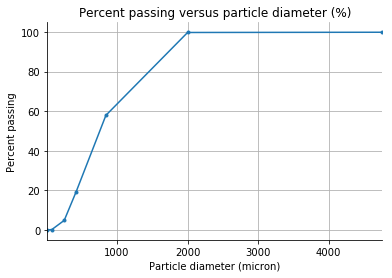

In [9]:
ax = df.plot(x='particle diameter', y='passing pct', style='.-',\
             legend=False, color=c[1], grid=True)
ax.set_xlabel('Particle diameter (micron)')
ax.set_ylabel('Percent passing')
ax.set_title('Percent passing versus particle diameter (%)')
ax.grid(True, which='minor', axis='x')
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')
ax.figure.savefig('sieve_percent_passing_vs_diameter.svg', format='svg')
ax.figure.savefig('sieve_percent_passing_vs_diameter.pdf', format='pdf')